In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

from numpy import ravel
import utils

from sklearn.cluster import KMeans
from sklearn import preprocessing

In [2]:
# pip install utils

# Loading the dataset

In [3]:
# Loading the dataset 

df = pd.read_csv("BRFA_clean.csv", index_col = 0)

In [4]:
# Function to display entire dataframe

def set_pandas_display_options() -> None:
    """Set pandas display options."""
    # Ref: https://stackoverflow.com/a/52432757/
    display = pd.options.display

    display.max_columns = 200
    display.max_rows = 100
    display.max_colwidth = 199
    display.width = 1000
    # display.precision = 2  # set as needed

set_pandas_display_options()

In [5]:
df.reset_index(inplace=True)

In [6]:
display(df)

,State,Date,Final Disposition,Correct Telephone Number,Private Residence,Reside in State,Cellular Telephone,Number of Adults,General Health,Physical Health,Mental Health,Poor Health,Health Care Coverage,Personal Doctor,No Medical Cost,Last Routine Checkup,Blood Pressure High,Blood Cholesterol Checked,Blood Cholesterol Checked in past years,Blood Cholesterol High,Heart Attack,Angina or Coronary heart Disease,Stroke,Asthma,Skin Cancer,Any Other Cancer,COPD,Arthritis Gout Lupus,Depressive Disorder,Kidney Disease,Diabetes,Sex,Marital Status,Education Level,Own or Rent Home,Household Telephones,Personal Phone,Veteran,Employment Status,Number of Children,Income Level,Internet Use,Weight in Pounds,Height in Feet and Inches,Activity Limitation Due to Health Problems,Health Problems Requiring Special Equipment,Blind or Difficulty Seeing,Difficulty Concentrating or Remembering,Difficulty Walking or Climbing Stairs,Difficulty Dressing or Bathing,Difficulty Doing Errands Alone,Smoking,Tobacco Products,Alcoholic Beverage,Pure Fruit Juices,Fruits and Vegetables,Beans or Lentils,Dark Green Vegetables,Orange-colored Vegetables,OTHER Vegetables,Exercise,Type of Exercise,"Walking, Running, Jogging, or Swimming",Exercise Period,Exercise During Past Month,STRENGTHEN Your Muscles,Seatbelt Use,Immunization,Pneumonia Shot Ever,HIV,Prostate Cancer,Questionnaire Version Identifier,Language identifier,Metropolitan Status Code,Sample Design Stratification Variable,Stratum weight,Raw weighting factor,Design weight,Dual Phone Use Categories,Dual Phone Use Correction Factor,Final weight,Adults Health,Health Care Coverage.1,High Blood Pressure Check,Cholesterol Check,High Cholesterol Calculate,Coronary Heart Disease or MI,Lifetime Asthma,Current Asthma,Computed Asthma,Respondents With Arthritis,Computed Preferred Race,Calculated Non-Hispanic Race,"Hispanic, Latino or Spanish",Race-Ethnicity,Non-Hispanic Whites,Five Level Race,Race Groups for Internet,Above 80,Computed Height Inches,Computed Height Meters,Weight in Kilograms,Body Mass Index,Mass Index Categories,Overweight,Children in Household,Education Completed Categories,Computed Income,Computed Smoking Status,Smoking Calculated Variable,Drink any Alcoholic Beverages,Binge Drinking,Heavy Alcohol Consumption,Vegetable Intake,Fruits Consumed,Vegetables Consumed,Fruits Per Day,Vegetables Per Day,Fruits Greater than 16,Vegetables Greater than 23,Leisure Time Physical Activity,MET Value for First Activity,Maximum Oxygen,Estimated Functional Capacity,Intensity for First Activity,Minutes of First Activity,Physical Activity Frequency,Activity Minutes,Activity Minutes Weekly,Categories,Physical Activity Index,Physical Activity 150,300 Minute Activity,300 Minute Activity 2-Level,Muscle Strengthening,Aerobic,Aerobic 2-Level,Limited Usual Activities,Limited Work Activities,Limited Social Activities,Nearly Wear Seat Belts,Always Wear Seat Belts,Tested HIV
0,1,2015-12-09,1200,1.0,1.0,1.0,2.0,3.0,5.0,15,18,10.0,1,1,2,1,1,1,1.0,1.0,2,2,2,1,2,2,1,1,1,2,3.0,2,1,4,1,2.0,1.0,2,8,88.0,3.0,2.0,280.0,510.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,3.0,888.0,305.0,310.0,320.0,310.0,305.0,101.0,2.0,NaN,NaN,NaN,NaN,888.0,1.0,1.0,1.0,1.0,NaN,10,1,3.0,11011,28.781560,3.0,86.344681,1,0.614125,341.384853,2,1,2,1,2.0,2.0,2,2,1,1.0,1,1,2,1,1,1,1.0,63,70.0,178.0,12701.0,4018.0,4.0,2,1,2,2,3,1,2,1,1,100.0,50.0,217.0,2,1,1.0,1.0,2,NaN,2469,423,NaN,NaN,NaN,NaN,NaN,4,2,3,3,2,2,4,2,1.0,1.0,1.0,1,1,1.0
1,1,2015-01-20,1100,1.0,1.0,1.0,2.0,1.0,3.0,88,88,49.0,2,1,1,4,3,1,4.0,2.0,2,2,2,2,2,2,2,2,2,2,3.0,2,2,6,1,2.0,2.0,2,3,88.0,1.0,1.0,165.0,508.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,3.0,888.0,302.0,305.0,302.0,202.0,202.0,304.0,1.0,64.000000,212.00,100.000000,69.0,888.0,3.0,2.0,2.0,2.0,NaN,10,1,5.0,11011,28.781560,1.0,28.781560,9,0.614125,108.060903,1,2,1,2,1.0,2.0,1,1,3,2.0,1,1,2,1,1,1,1.0,52,68.0,173.0,7484.0,2509.0,3.0,2,1,4,1,1,2,2,1,1,13.0,24.0,78.0,2,2,1.0,1.0,1,35.00,2876,493,1.00,60.0,2800.0,168.0,168.0,2,1,1,2,2,2,2,2,3.0,3.0,4.0,2,2,2.0
2,1,2015-02-0

In [7]:
# Listing total number of columns

df.columns.values.tolist()

['State',
 'Date',
 'Final Disposition',
 'Correct Telephone Number',
 'Private Residence',
 'Reside in State',
 'Cellular Telephone',
 'Number of Adults',
 'General Health',
 'Physical Health',
 'Mental Health',
 'Poor Health',
 'Health Care Coverage',
 'Personal Doctor',
 'No Medical Cost',
 'Last Routine Checkup',
 'Blood Pressure High',
 'Blood Cholesterol Checked',
 'Blood Cholesterol Checked in past years',
 'Blood Cholesterol High',
 'Heart Attack',
 'Angina or Coronary heart Disease',
 'Stroke',
 'Asthma',
 'Skin Cancer',
 'Any Other Cancer',
 'COPD',
 'Arthritis Gout Lupus',
 'Depressive Disorder',
 'Kidney Disease',
 'Diabetes',
 'Sex',
 'Marital Status',
 'Education Level',
 'Own or Rent Home',
 'Household Telephones',
 'Personal Phone',
 'Veteran',
 'Employment Status',
 'Number of Children',
 'Income Level',
 'Internet Use',
 'Weight in Pounds',
 'Height in Feet and Inches',
 'Activity Limitation Due to Health Problems',
 'Health Problems Requiring Special Equipment',
 'Bl

In [8]:
df.dtypes

State                          int64
Date                          object
Final Disposition              int64
Correct Telephone Number     float64
Private Residence            float64
                              ...   
Limited Work Activities      float64
Limited Social Activities    float64
Nearly Wear Seat Belts         int64
Always Wear Seat Belts         int64
Tested HIV                   float64
Length: 143, dtype: object

# Correlation Testing

In [9]:
# Impacts of healthy habits on general health

coeffs = df[['Vegetable Intake', 'Fruits Consumed', 'Exercise', 'Tobacco Products', 'Immunization', 'Seatbelt Use',
             'Blind or Difficulty Seeing','Asthma', 'Kidney Disease','Diabetes', 'Smoking', 
             'Alcoholic Beverage', 'Coronary Heart Disease or MI','General Health']].corr()

In [10]:
display(coeffs)

,Vegetable Intake,Fruits Consumed,Exercise,Tobacco Products,Immunization,Seatbelt Use,Blind or Difficulty Seeing,Asthma,Kidney Disease,Diabetes,Smoking,Alcoholic Beverage,Coronary Heart Disease or MI,General Health
Vegetable Intake,1.000000,0.307364,-0.035840,0.001626,-0.019063,-0.023058,0.000188,-0.005232,0.003487,0.019965,-0.003908,-0.045269,0.013442,-0.066789
Fruits Consumed,0.307364,1.000000,-0.036554,0.012251,-0.014469,-0.017107,0.006102,-0.002916,0.000891,0.024563,0.032117,0.002718,0.013507,-0.065786
Exercise,-0.035840,-0.036554,1.000000,0.551230,0.701596,0.670420,0.373707,-0.001246,0.007910,-0.028997,0.449578,0.132654,-0.017611,0.099661
Tobacco Products,0.001626,0.012251,0.551230,1.000000,0.561262,0.507376,0.442651,0.012514,0.018259,0.011704,0.642250,0.085519,0.012976,-0.003063
Immunization,-0.019063,-0.014469,0.701596,0.561262,1.000000,0.694858,0.349033,0.014106,0.019138,0.041040,0.477436,0.063403,0.044489,-0.009805
Seatbelt Use,-0.023058,-0.017107,0.670420,0.507376,0.694858,1.000000,0.327502,-0.001442,0.010577,-0.000099,0.427245,0.078191,-0.001108,0.041683
Blind or Difficulty Seeing,0.000188,0.006102,0.373707,0.442651,0.349033,0.327502,1.000000,0.031758,0.027312,0.031994,0.414879,0.053482,0.029857,-0.046969
Asthma,-0.005232,-0.002916,-0.001246,0.012514,0.014106,-0.001442,0.031758,1.000000,0.104613,0.070287,0.019720,-0.015487,0.032122,-0.078886
Kidney Disease,0.003487,0.000891,0.007910,0.018259,0.019138,0.010577,0.027312,0.104613,1.000000,0.108188,0.019842,-0.008984,0.035984,-0.035684
Diabetes,0.019965,0.024563,-0.028997,0.011704,0.041040,-0.000099,0.031994,0.070287,0.108188,1.000000,0.032057,-0.123815,0.153204,-0.232392


# Random Forest Classifier

In [11]:
df_new = df[['Vegetable Intake', 'Fruits Consumed', 'Exercise','Seatbelt Use', 'Blind or Difficulty Seeing',
             'Asthma','Kidney Disease', 'Diabetes', 'Smoking', 'Alcoholic Beverage', 
             'Coronary Heart Disease or MI','General Health']]
df_new

,Vegetable Intake,Fruits Consumed,Exercise,Seatbelt Use,Blind or Difficulty Seeing,Asthma,Kidney Disease,Diabetes,Smoking,Alcoholic Beverage,Coronary Heart Disease or MI,General Health
0,100.0,50.0,2.0,1.0,2.0,1,2,3.0,1.0,888.0,2.0,5.0
1,13.0,24.0,1.0,3.0,1.0,2,2,3.0,1.0,888.0,2.0,3.0
2,13.5,62.0,1.5,2.0,2.0,2,2,3.0,1.5,888.0,2.0,4.0
3,14.0,100.0,2.0,1.0,1.0,2,2,3.0,2.0,888.0,2.0,5.0
4,67.0,150.0,2.0,1.0,2.0,2,2,3.0,2.0,888.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
106451,200.0,300.0,1.0,1.0,2.0,1,2,3.0,1.0,888.0,2.0,5.0
106452,57.0,117.0,2.0,1.0,2.0,2,2,3.0,2.0,103.0,2.0,2.0
106453,33.0,26.0,2.0,1.0,2.0,2,2,3.0,2.0,888.0,2.0,2.0
106454,100.0,86.0,1.0,1.0,2.0,1,2,1.0,1.0,888.0,2.0,2.0


In [12]:
df_new.dtypes

Vegetable Intake                float64
Fruits Consumed                 float64
Exercise                        float64
Seatbelt Use                    float64
Blind or Difficulty Seeing      float64
Asthma                            int64
Kidney Disease                    int64
Diabetes                        float64
Smoking                         float64
Alcoholic Beverage              float64
Coronary Heart Disease or MI    float64
General Health                  float64
dtype: object

In [13]:
# Converting to categorical values

ord_enc = OrdinalEncoder()
df_new["Vegetable Intake"] = ord_enc.fit_transform(df_new[["Vegetable Intake"]])
df_new["Fruits Consumed"] = ord_enc.fit_transform(df_new[["Fruits Consumed"]])
df_new["Exercise"] = ord_enc.fit_transform(df_new[["Exercise"]])
df_new["Seatbelt Use"] = ord_enc.fit_transform(df_new[["Seatbelt Use"]])
df_new["Blind or Difficulty Seeing"] = ord_enc.fit_transform(df_new[["Blind or Difficulty Seeing"]])
df_new["Asthma"] = ord_enc.fit_transform(df_new[["Asthma"]])
df_new["Kidney Disease"] = ord_enc.fit_transform(df_new[["Kidney Disease"]])
df_new["Diabetes"] = ord_enc.fit_transform(df_new[["Diabetes"]])
df_new["Smoking"] = ord_enc.fit_transform(df_new[["Smoking"]])
df_new["Alcoholic Beverage"] = ord_enc.fit_transform(df_new[["Alcoholic Beverage"]])
df_new["Coronary Heart Disease or MI"] = ord_enc.fit_transform(df_new[["Coronary Heart Disease or MI"]])
df_new["General Health"] = ord_enc.fit_transform(df_new[["General Health"]])

C:\Users\asmit\AppData\Local\Temp\ipykernel_6372\4118462908.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Vegetable Intake"] = ord_enc.fit_transform(df_new[["Vegetable Intake"]])
C:\Users\asmit\AppData\Local\Temp\ipykernel_6372\4118462908.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Fruits Consumed"] = ord_enc.fit_transform(df_new[["Fruits Consumed"]])
C:\Users\asmit\AppData\Local\Temp\ipykernel_6372\4118462908.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [14]:
x= df_new.iloc [:, : -1]
y= df_new.iloc [:, -1 :]

In [15]:
x

,Vegetable Intake,Fruits Consumed,Exercise,Seatbelt Use,Blind or Difficulty Seeing,Asthma,Kidney Disease,Diabetes,Smoking,Alcoholic Beverage,Coronary Heart Disease or MI
0,444.0,201.0,12.0,0.0,4.0,0.0,1.0,2.0,0.0,329.0,6.0
1,33.0,79.0,0.0,25.0,0.0,1.0,1.0,2.0,0.0,329.0,6.0
2,36.0,266.0,6.0,14.0,4.0,1.0,1.0,2.0,4.0,329.0,6.0
3,38.0,487.0,12.0,0.0,0.0,1.0,1.0,2.0,8.0,329.0,6.0
4,315.0,738.0,12.0,0.0,4.0,1.0,1.0,2.0,8.0,329.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...
106451,591.0,1215.0,0.0,0.0,4.0,0.0,1.0,2.0,0.0,329.0,6.0
106452,268.0,586.0,12.0,0.0,4.0,1.0,1.0,2.0,8.0,8.0,6.0
106453,133.0,87.0,12.0,0.0,4.0,1.0,1.0,2.0,8.0,329.0,6.0
106454,444.0,401.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,329.0,6.0


In [16]:
display(y)

,General Health
0,5.0
1,2.0
2,4.0
3,5.0
4,5.0
...,...
106451,5.0
106452,1.0
106453,1.0
106454,1.0


In [17]:
# Train and Test split

x_train = x.iloc [0:80000]
y_train = y.iloc [0:80000]

x_test = x.iloc [80000:106456] 
y_test = y.iloc [80000:106456] 

In [18]:
display(x_train)

,Vegetable Intake,Fruits Consumed,Exercise,Seatbelt Use,Blind or Difficulty Seeing,Asthma,Kidney Disease,Diabetes,Smoking,Alcoholic Beverage,Coronary Heart Disease or MI
0,444.0,201.0,12.0,0.0,4.0,0.0,1.0,2.0,0.0,329.0,6.0
1,33.0,79.0,0.0,25.0,0.0,1.0,1.0,2.0,0.0,329.0,6.0
2,36.0,266.0,6.0,14.0,4.0,1.0,1.0,2.0,4.0,329.0,6.0
3,38.0,487.0,12.0,0.0,0.0,1.0,1.0,2.0,8.0,329.0,6.0
4,315.0,738.0,12.0,0.0,4.0,1.0,1.0,2.0,8.0,329.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...
79995,268.0,51.0,0.0,0.0,4.0,1.0,1.0,2.0,8.0,118.0,6.0
79996,268.0,487.0,0.0,0.0,4.0,1.0,1.0,2.0,8.0,162.0,6.0
79997,591.0,310.0,0.0,0.0,4.0,1.0,1.0,2.0,8.0,11.0,6.0
79998,591.0,944.0,0.0,0.0,4.0,0.0,1.0,2.0,0.0,108.0,6.0


In [19]:
display(y_train)

,General Health
0,5.0
1,2.0
2,4.0
3,5.0
4,5.0
...,...
79995,1.0
79996,1.0
79997,0.0
79998,2.0


In [20]:
display(x_test)

,Vegetable Intake,Fruits Consumed,Exercise,Seatbelt Use,Blind or Difficulty Seeing,Asthma,Kidney Disease,Diabetes,Smoking,Alcoholic Beverage,Coronary Heart Disease or MI
80000,401.0,51.0,0.0,0.0,4.0,1.0,1.0,2.0,0.0,8.0,6.0
80001,426.0,576.0,0.0,0.0,4.0,1.0,1.0,2.0,8.0,104.0,6.0
80002,444.0,989.0,0.0,0.0,4.0,1.0,1.0,2.0,0.0,329.0,6.0
80003,401.0,1083.0,0.0,0.0,4.0,1.0,1.0,2.0,0.0,118.0,6.0
80004,315.0,644.0,0.0,0.0,4.0,1.0,1.0,2.0,0.0,178.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...
106451,591.0,1215.0,0.0,0.0,4.0,0.0,1.0,2.0,0.0,329.0,6.0
106452,268.0,586.0,12.0,0.0,4.0,1.0,1.0,2.0,8.0,8.0,6.0
106453,133.0,87.0,12.0,0.0,4.0,1.0,1.0,2.0,8.0,329.0,6.0
106454,444.0,401.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,329.0,6.0


In [21]:
display(y_test)

,General Health
80000,4.0
80001,0.0
80002,2.0
80003,2.0
80004,2.0
...,...
106451,5.0
106452,1.0
106453,1.0
106454,1.0


In [43]:
# Converting dataframe to csv

y.to_csv('Y labels.csv', index = False)

In [22]:
y_test['General Health'].unique()

array([4., 0., 2., 1., 5., 7., 6.])

In [23]:
# Fitting Random Forest Classifier to the dataset

# Create classifier object

classifier = RandomForestClassifier(n_estimators=50, random_state=100)

In [24]:
# Fit the classifier with train data

classifier.fit(x_train, y_train)

C:\Users\asmit\AppData\Local\Temp\ipykernel_6372\1173764511.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train, y_train)


RandomForestClassifier(n_estimators=50, random_state=100)

In [25]:
# Prediction of future values for general health

prediction = classifier.predict(x_test)

In [26]:
# Performance evaluation

print (classifier.score(x_train, y_train))
print(classifier.score(x_test, y_test))

0.7979
0.3212881765951013


In [27]:
# Confusion matrix for performance evaluation 

confusion_matrix(y_test, prediction, labels=[1, 2, 0, 4, 5, 7, 6])

array([[3799, 2472, 1508,  636,  143,    1,    1],
       [3245, 2922, 1111,  986,  292,    0,    5],
       [2249, 1083,  948,  233,   61,    0,    2],
       [1005, 1267,  275,  644,  275,    2,    2],
       [ 237,  450,   55,  309,  187,    2,    1],
       [   7,    6,    4,    4,    2,    0,    0],
       [   2,   10,    3,    8,    2,    0,    0]], dtype=int64)

In [28]:
# Features that contributes most to general health

pd.DataFrame(classifier.feature_importances_, index=x_train.columns).sort_values(by=0, ascending=False)

,0
Fruits Consumed,0.413997
Vegetable Intake,0.245757
Alcoholic Beverage,0.153399
Seatbelt Use,0.044966
Diabetes,0.033042
Exercise,0.028070
Smoking,0.024543
Asthma,0.016294
Blind or Difficulty Seeing,0.014080
Coronary Heart Disease or MI,0.013717


# Decision Tree Classifier

In [29]:
# Create classifier object

dclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state=50, max_depth = 3, min_samples_leaf = 5)

In [30]:
# Fit the classifier with train data

dclassifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=50)

In [31]:
dprediction = dclassifier.predict(x_test)

In [32]:
# Performance evaluation

print (dclassifier.score(x_train, y_train))
print(dclassifier.score(x_test, y_test))

0.37075
0.3769655276685818


In [33]:
# Confusion matrix for performance evaluation 

confusion_matrix(y_test, dprediction, labels=[1, 2, 0, 4, 5, 7, 6])

array([[6410, 1934,    0,  194,   22,    0,    0],
       [5005, 2876,    0,  608,   72,    0,    0],
       [3850,  671,    0,   46,    9,    0,    0],
       [1337, 1439,    0,  585,  109,    0,    0],
       [ 301,  519,    0,  319,  102,    0,    0],
       [  11,    8,    0,    4,    0,    0,    0],
       [  10,   13,    0,    2,    0,    0,    0]], dtype=int64)

In [34]:
# Features that contributes most to general health

pd.DataFrame(dclassifier.feature_importances_, index=x_train.columns).sort_values(by=0, ascending=False)

,0
Diabetes,0.469372
Exercise,0.304638
Coronary Heart Disease or MI,0.225990
Vegetable Intake,0.000000
Fruits Consumed,0.000000
Seatbelt Use,0.000000
Blind or Difficulty Seeing,0.000000
Asthma,0.000000
Kidney Disease,0.000000
Smoking,0.000000


# K-Means Clustering

In [35]:
# Normalize the data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_new)

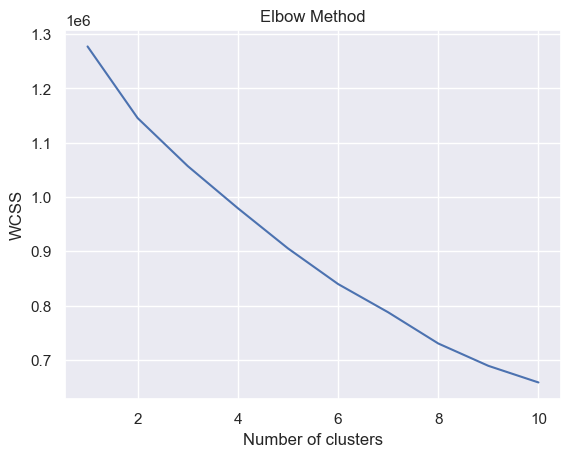

In [36]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [37]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)

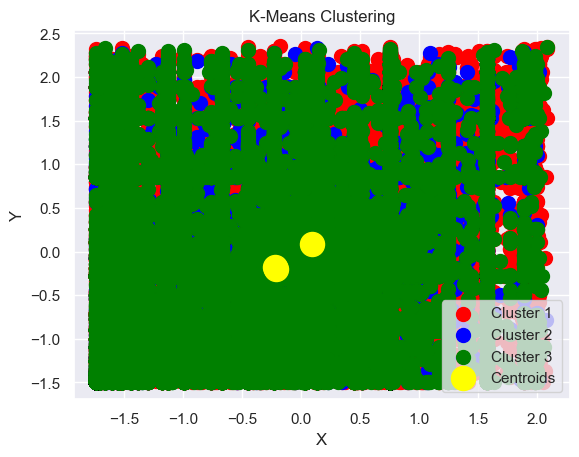

In [38]:
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('K-Means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [39]:
# Cluster 3

X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1]

(array([ 0.75292607, -1.55050752, -1.53369413, ...,  1.57678188,
         0.75292607,  1.57678188]),
 array([-0.99810357, -1.3026076 , -0.83586781, ...,  1.53277426,
        -0.49891662,  0.25984754]))

In [40]:
# Cluster 2

X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1]

(array([-1.73545474, -0.23345912, -0.45203311, ..., -0.45203311,
        -1.52248521, -1.52248521]),
 array([-0.28426623,  0.25984754, -0.69609546, ..., -1.1229003 ,
        -1.058006  , -1.39495719]))

In [41]:
# Cluster 1 

X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1]

(array([ 0.75292607,  0.13643533, -1.12456846, ..., -1.12456846,
        -0.23345912, -0.99006139]),
 array([ 0.85637594,  0.10759552,  1.53277426, ..., -1.46484336,
        -0.03716869, -1.28264013]))

In [42]:
# Converting scaled data to original 

scaler = preprocessing.StandardScaler()
df1 = pd.DataFrame(scaler.fit_transform(df_new), index=df_new.index, columns=df_new.columns)
df1

,Vegetable Intake,Fruits Consumed,Exercise,Seatbelt Use,Blind or Difficulty Seeing,Asthma,Kidney Disease,Diabetes,Smoking,Alcoholic Beverage,Coronary Heart Disease or MI,General Health
0,0.752926,-0.998104,1.480984,-0.334914,0.109727,-2.440062,0.155306,0.342318,-1.109115,0.958754,0.305535,2.279907
1,-1.550508,-1.302608,-0.576448,2.310909,-3.384735,0.383070,0.155306,0.342318,-1.109115,0.958754,0.305535,0.178936
2,-1.533694,-0.835868,0.452268,1.146747,0.109727,0.383070,0.155306,0.342318,-0.179091,0.958754,0.305535,1.579584
3,-1.522485,-0.284266,1.480984,-0.334914,-3.384735,0.383070,0.155306,0.342318,0.750933,0.958754,0.305535,2.279907
4,0.029951,0.342213,1.480984,-0.334914,0.109727,0.383070,0.155306,0.342318,0.750933,0.958754,0.305535,2.279907
...,...,...,...,...,...,...,...,...,...,...,...,...
106451,1.576782,1.532774,-0.576448,-0.334914,0.109727,-2.440062,0.155306,0.342318,-1.109115,0.958754,0.305535,2.279907
106452,-0.233459,-0.037169,1.480984,-0.334914,0.109727,0.383070,0.155306,0.342318,0.750933,-1.645626,0.305535,-0.521388
106453,-0.990061,-1.282640,1.480984,-0.334914,0.109727,0.383070,0.155306,0.342318,0.750933,0.958754,0.305535,-0.521388
106454,0.752926,-0.498917,-0.576448,-0.334914,0.109727,-2.440062,0.155306,-2.516985,-1.109115,0.958754,0.305535,-0.521388
